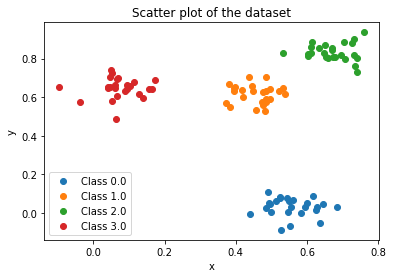

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def generate_dataset(num_points, num_classes, domain = [0,1], cluster_std=0.05, min_center_distance=-1):
    if (min_center_distance == -1):
        min_center_distance = cluster_std
    points_per_class = num_points // num_classes
    remainder = num_points % num_classes
    dataset = []
    centers = []

    def is_center_far_enough(new_center, centers, min_distance):
        return all(np.linalg.norm(new_center - c) >= min_distance for c in centers)

    for i in range(num_classes):
        # adjust the fact that the overall number of points might not be a perfect multiple of the number of classes
        if i < remainder:
            num_points_in_class = points_per_class + 1
        else:
            num_points_in_class = points_per_class

        while True:
            x_center = np.random.uniform(domain[0],domain[1])
            y_center = np.random.uniform(domain[0],domain[1])
            center = np.array([x_center, y_center])
            if is_center_far_enough(center, centers, min_center_distance):
                centers.append(center)
                break

        x_points = np.random.normal(x_center, cluster_std, num_points_in_class)
        y_points = np.random.normal(y_center, cluster_std, num_points_in_class)
        points = np.column_stack((x_points, y_points))
        labels = np.full(num_points_in_class, i)
        class_data = np.column_stack((points, labels))
        dataset.append(class_data)

    dataset = np.vstack(dataset)
    np.random.shuffle(dataset)
    return dataset

def scatter_dataset(dataset):
    X, y = dataset[:, :2], dataset[:, 2]
    unique_classes = np.unique(y)
    for cls in unique_classes:
        class_data = X[y == cls]
        plt.scatter(class_data[:, 0], class_data[:, 1], label=f"Class {cls}")

    plt.legend()
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Scatter plot of the dataset")
    plt.show()

num_points = 100
num_classes = 4
dataset = generate_dataset(num_points, num_classes)
scatter_dataset(dataset)

In [8]:
from scipy.io import savemat
X, Y = dataset[:, :2], dataset[:, 2].reshape(-1, 1)
savemat("X_new.mat", {"X": X})
savemat("Y_new.mat", {"Y": Y})